# ML based Retail Product Sentiment Classification without Vocabulary

In [32]:
import pandas
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

%matplotlib inline

In [33]:
products = pandas.read_csv('amazon_baby.csv')
products.shape

(183531, 3)

In [34]:
products.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


In [35]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
name      183213 non-null object
review    182702 non-null object
rating    183531 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [36]:
products.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [37]:
products['review_length'] = products['review'].str.len()

In [38]:
products.head(10)

,name,review,rating,review_length
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,452.0
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,158.0
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,143.0
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,390.0
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,405.0
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,495.0
6,A Tale of Baby\'s Days with Peter Rabbit,"Lovely book, it\'s bound tightly so you may no...",4,217.0
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5,254.0
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,196.0
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,416.0


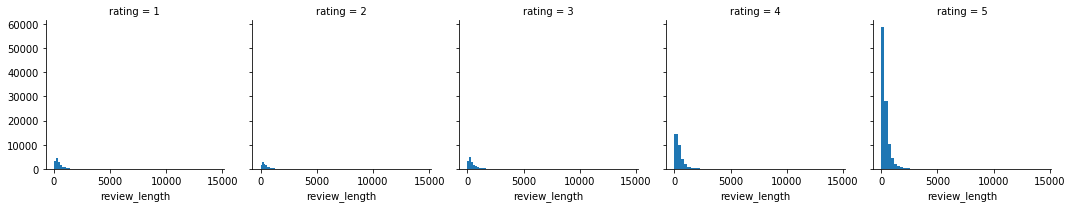

In [39]:
g = sns.FacetGrid(data=products, col='rating')
g.map(plt.hist, 'review_length', bins=50)

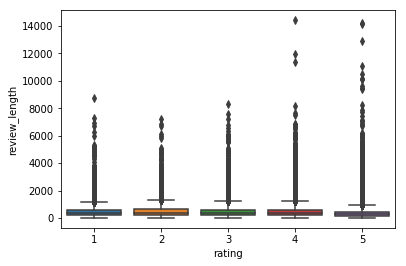

In [40]:
sns.boxplot(x='rating', y='review_length', data=products)

In [41]:
products.review_length.max()

14424.0

In [42]:
products_class = products[(products['rating'] <= 2) | (products['rating'] >= 4)]
products_class.shape

(166752, 4)

In [43]:
products_class['prod_cat'] = products_class.rating.map( lambda x: 0 if x < 3 else 1)

C:\Users\ss20228\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
products_class.prod_cat.value_counts()

1    140259
0     26493
Name: prod_cat, dtype: int64

In [45]:
products_class = products_class.dropna()
products_class.shape

(165679, 5)

In [46]:
X = products_class['review']
y = products_class['prod_cat']

In [47]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [48]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [49]:
X[5]

"When the Binky Fairy came to our house, we didn\\'t have any special gift and book to help explain to her about how important it is to stop using a pacifier. This book does a great job to help prepare your child for the loss of their favorite item. The doll is adorable and we made lots of cute movies with the Binky Fairy telling our daughter about what happens when the Binky Fairy comes. I would highly recommend this product for any parent trying to break the pacifier or thumb sucking habit."

In [50]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [51]:
#without custom words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(X)

In [52]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

Shape of Sparse Matrix:  (165679, 64130)
Amount of Non-Zero occurrences:  8819076


In [53]:
# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print("Density: {}".format((density)))

Density: 0.0830031129983847


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

C:\Users\ss20228\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
preds = LogR.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds))

[[ 5789  2190]
 [ 1294 40431]]


              precision    recall  f1-score   support

           0       0.82      0.73      0.77      7979
           1       0.95      0.97      0.96     41725

   micro avg       0.93      0.93      0.93     49704
   macro avg       0.88      0.85      0.86     49704
weighted avg       0.93      0.93      0.93     49704

0.9299050378239176


In [58]:
print(LogR.coef_)

[[-5.06393497e-01 -5.58552456e-02  4.94830208e-03 ...  2.32349002e-02
   7.47964302e-03 -1.01009656e-04]]


#External reading

- https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words
- http://nbviewer.ipython.org/github/justmarkham/DAT8/blob/master/notebooks/14_text_data_sklearn.ipynb
- https://github.com/jakevdp/sklearn_pycon2013/tree/master/notebooks
- http://nbviewer.ipython.org/github/justmarkham/DAT8/tree/master/notebooks/
- https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/blob/master/example-data-science-notebook/Example%20Machine%20Learning%20Notebook.ipynb

##### Dont forget to check my other ML projects in Github for further interest.
https://github.com/Shashank545